In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df1 =pd.read_csv("/content/drive/MyDrive/Dataset/train_transaction.csv")

df3 =pd.read_csv("/content/drive/MyDrive/Dataset/train_identity.csv")



In [ ]:
df1.head()

In [ ]:
print("Columns of train_transaction:\n",df1.columns)
print("----------------------------------------\n")
print("Total No.of columns:",len(df1.columns))
print("----------------------------------------\n")
print("Total No.of rows:",df1.shape[0])
print("----------------------------------------\n")
print(df1.isna().sum())
print("----------------------------------------\n")
print(len(df1.columns[df1.columns.duplicated()]))

In [ ]:
print("Columns of train_identity:\n",df3.columns)
print("----------------------------------------\n")
print("Total No.of columns:",len(df3.columns))
print("----------------------------------------\n")
print(df3.isna().sum())
print("----------------------------------------\n")
print(len(df3.columns[df3.columns.duplicated()]))

In [ ]:
df1['isFraud'].value_counts()

In [ ]:
class_counts = df1['isFraud'].value_counts()
colors = ['skyblue', 'orange']
plt.figure(figsize=(4, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=0,colors=colors)
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Is Fraud', size=15,**hfont)
plt.legend()

plt.show()

In [ ]:
dfc = df1.merge(df3, how='left', on='TransactionID')

In [ ]:
dfc.head()

In [ ]:
dfc.shape

In [ ]:
df=dfc[0:200000]

In [ ]:
df.shape

(275000, 425)

In [ ]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=425)

In [ ]:
cat_features = ['ProductCD','card4','card6', 'P_emaildomain', 'R_emaildomain',
                'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 'id_15',
                'id_16','id_23','id_27','id_28','id_29','id_30','id_31',
                'id_33','id_34','id_35','id_36','id_37','id_38']

num_features = [x for x in df.columns.values[2:] if x not in cat_features]

features = num_features + cat_features

print('Categorical features :', len(cat_features))
print('Numerical features : ',len(num_features))

Categorical features : 29
Numerical features :  394


In [ ]:
'''imputer = SimpleImputer(strategy='median')
imputer.fit(df[num_features])
df[num_features] = imputer.transform(df[num_features])'''

<ipython-input-28-70a52d4eb02e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_features] = imputer.transform(df[num_features])


In [ ]:
v_columns = ['V' + str(i) for i in range(1, 340)]

In [ ]:
non_V_columns=[x for x in num_features if x not in v_columns]

In [ ]:
vdf = df[v_columns]

In [ ]:
pca = PCA(n_components=30)
pca.fit(vdf)
v_transformed = pca.transform(vdf)

In [ ]:
column_names = ['column_{}'.format(i+1) for i in range(30)]
v_transformed_df=pd.DataFrame(v_transformed, columns=column_names)

In [ ]:
v_transformed_df.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30
0,-13978.184232,-221.296551,-157.558423,-78.358566,-84.695955,-96.782835,-6.149057,-46.373695,-42.696896,-92.456478,...,12.633400,1.405005,-1.077056,3.703103,-0.514475,-8.854386,8.936489,8.265458,3.194499,-2.873413
1,-13978.055363,-227.347099,-342.118422,-67.484780,-64.977425,-118.876293,65.368515,14.691067,-76.129546,-22.262423,...,8.922998,-4.860597,-0.329065,3.345114,4.283137,-1.610016,2.036291,1.828361,3.042834,0.939653
2,-13978.055361,-227.347093,-342.118391,-67.484774,-64.977429,-118.876176,65.368432,14.690971,-76.129417,-22.262124,...,8.922789,-4.860309,-0.329075,3.344912,4.283486,-1.610132,2.035864,1.827741,3.043149,0.940127
3,-13980.435762,-104.617283,2741.899300,-238.437961,-147.000170,984.923872,-1209.292914,-665.017834,103.450225,-326.827166,...,16.521080,-46.478919,-28.375785,20.795244,84.689869,-41.053082,45.411026,-7.402995,-60.942024,-8.028931
4,156387.479105,-127.929348,160.579353,6853.061216,-104.298581,-55.407364,320.543326,-321.952861,40.038462,10.008481,...,530.127497,266.910922,-919.397625,251.670863,-385.238075,440.804482,157.339174,-75.348909,-1.614246,-100.125072


In [ ]:
v_transformed_df.shape

(275000, 30)

In [ ]:
scaler=StandardScaler()
v_transformed_df=scaler.fit_transform(v_transformed_df)

In [ ]:
v_transformed_df_scaled=pd.DataFrame(v_transformed_df, columns=column_names)

In [ ]:
df[non_V_columns] = scaler.fit_transform(df[non_V_columns])

<ipython-input-39-e6093edb8e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[non_V_columns] = scaler.fit_transform(df[non_V_columns])


In [ ]:
df.drop(v_columns,inplace=True, axis=1)

<ipython-input-40-b90139223f41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(v_columns,inplace=True, axis=1)


In [ ]:
label_encoder = LabelEncoder()
for col in cat_features:
    df[col] = label_encoder.fit_transform(df[col])



<ipython-input-41-cacab9ee3559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-41-cacab9ee3559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-41-cacab9ee3559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df.head

<bound method NDFrame.head of         TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  \
0             2987000        0      -1.590961       -0.269163          4   
1             2987001        0      -1.590960       -0.436819          4   
2             2987002        0      -1.590924       -0.309485          4   
3             2987003        0      -1.590908       -0.347685          4   
4             2987004        0      -1.590905       -0.347685          1   
...               ...      ...            ...             ...        ...   
274995        3261995        0       1.889866       -0.347685          3   
274996        3261996        0       1.889881       -0.267253          4   
274997        3261997        1       1.889903       -0.469124          0   
274998        3261998        0       1.889940        0.682660          4   
274999        3261999        0       1.889946       -0.292172          0   

           card1     card2     card3  card4     card5  ..

In [ ]:
v_transformed_df_scaled['TransactionID'] = df['TransactionID']

In [ ]:
df_new = df.merge(v_transformed_df_scaled, how='left', on='TransactionID')

In [ ]:
df_new.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30
0,2987000,0,-1.590961,-0.269163,4,0.827948,0.017192,-0.284218,1,-1.457628,...,0.072795,0.008733,-0.007256,0.025521,-0.003839,-0.069800,0.072084,0.070695,0.032091,-0.029646
1,2987001,0,-1.590960,-0.436819,4,-1.446414,0.239669,-0.284218,2,-2.451718,...,0.051415,-0.030210,-0.002217,0.023054,0.031957,-0.012692,0.016425,0.015638,0.030568,0.009695
2,2987002,0,-1.590924,-0.309485,4,-1.057955,0.786325,-0.284218,3,-0.861174,...,0.051414,-0.030209,-0.002217,0.023053,0.031960,-0.012693,0.016422,0.015633,0.030571,0.009700
3,2987003,0,-1.590908,-0.347685,4,1.684269,1.275773,-0.284218,2,-2.078934,...,0.095196,-0.288884,-0.191161,0.143318,0.631880,-0.323624,0.366299,-0.063318,-0.612208,-0.082836
4,2987004,0,-1.590905,-0.347685,1,-1.091751,0.938880,-0.284218,2,-2.451718,...,3.054652,1.658951,-6.193780,1.734480,-2.874301,3.474892,1.269144,-0.644464,-0.016216,-1.033015


In [ ]:
#df_new.to_csv('/content/drive/MyDrive/Dataset/Online_payment_Fraud.csv',index=False)

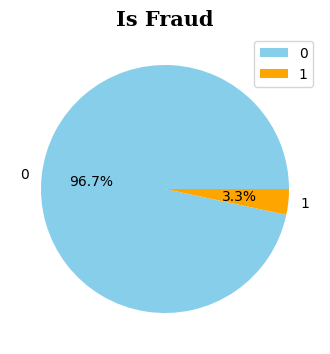

In [ ]:
class_counts = df_new['isFraud'].value_counts()
colors = ['skyblue', 'orange']
plt.figure(figsize=(4, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=0,colors=colors)
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Is Fraud', size=15,**hfont)
plt.legend()

plt.show()

In [ ]:
X=df_new.drop(['isFraud'],axis=1).values
y=df_new['isFraud'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
os=SMOTETomek()
print("The number of classes before fit {}".format(Counter(y_train)))
X_train,y_train=os.fit_resample(X_train,y_train)
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({0: 178104, 1: 6146})
The number of classes after fit Counter({0: 175496, 1: 175496})


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

y_pred2=xgb_clf.predict(X_train)
y_pred=xgb_clf.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred)
accuracy2=accuracy_score(y_train,y_pred2)
print('train_accuracy:', accuracy2*100 )
print('test_accuracy:' ,accuracy1*100)
print(classification_report(y_test,y_pred))
print('___________________________________________')

classes = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title('XGBoost',fontsize=16, fontweight='bold',pad=20)
plt.show()